In [ ]:
pip install natsort

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.simplefilter('ignore')
import os
from re import search
import shutil
import natsort
from tqdm import tqdm

In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense,Activation,Flatten, Conv2D, MaxPooling2D
import cv2
import numpy as np
import pandas as pd
from PIL import Image
from os import listdir
from os.path import isfile,join
from tensorflow import keras

In [3]:
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")
DIR = r'C:\Users\LENOVO\Documents\Patika\Plant Pathology\images'

In [4]:
train.head()

,image_id,healthy,multiple_diseases,rust,scab
0,Train_0,0,0,0,1
1,Train_1,0,1,0,0
2,Train_2,1,0,0,0
3,Train_3,0,0,1,0
4,Train_4,1,0,0,0


In [5]:
train.shape

(1821, 5)

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1821 entries, 0 to 1820
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   image_id           1821 non-null   object
 1   healthy            1821 non-null   int64 
 2   multiple_diseases  1821 non-null   int64 
 3   rust               1821 non-null   int64 
 4   scab               1821 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 71.3+ KB


In [7]:
train.isnull().sum()

image_id             0
healthy              0
multiple_diseases    0
rust                 0
scab                 0
dtype: int64

In [8]:
train[['healthy','multiple_diseases','rust','scab']].sum()

healthy              516
multiple_diseases     91
rust                 622
scab                 592
dtype: int64

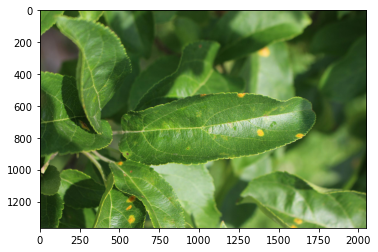

In [9]:
image1=Image.open(r'C:\Users\LENOVO\Documents\Patika\Plant Pathology\images\Test_0.jpg')
plt.imshow(image1)
plt.show()

In [10]:
class_names=train.loc[:,'healthy':].columns
print(class_names)
#class_names = ['healthy','multiple_diseases','rust','scab']

Index(['healthy', 'multiple_diseases', 'rust', 'scab'], dtype='object')


In [11]:
number=0
train['label']=0
for i in class_names:
    train['label'] += train[i] * number
    number=number+1

In [12]:
train.head()

,image_id,healthy,multiple_diseases,rust,scab,label
0,Train_0,0,0,0,1,3
1,Train_1,0,1,0,0,1
2,Train_2,1,0,0,0,0
3,Train_3,0,0,1,0,2
4,Train_4,1,0,0,0,0


In [13]:
natsort.natsorted(os.listdir(DIR))

['Test_0.jpg',
 'Test_1.jpg',
 'Test_2.jpg',
 'Test_3.jpg',
 'Test_4.jpg',
 'Test_5.jpg',
 'Test_6.jpg',
 'Test_7.jpg',
 'Test_8.jpg',
 'Test_9.jpg',
 'Test_10.jpg',
 'Test_11.jpg',
 'Test_12.jpg',
 'Test_13.jpg',
 'Test_14.jpg',
 'Test_15.jpg',
 'Test_16.jpg',
 'Test_17.jpg',
 'Test_18.jpg',
 'Test_19.jpg',
 'Test_20.jpg',
 'Test_21.jpg',
 'Test_22.jpg',
 'Test_23.jpg',
 'Test_24.jpg',
 'Test_25.jpg',
 'Test_26.jpg',
 'Test_27.jpg',
 'Test_28.jpg',
 'Test_29.jpg',
 'Test_30.jpg',
 'Test_31.jpg',
 'Test_32.jpg',
 'Test_33.jpg',
 'Test_34.jpg',
 'Test_35.jpg',
 'Test_36.jpg',
 'Test_37.jpg',
 'Test_38.jpg',
 'Test_39.jpg',
 'Test_40.jpg',
 'Test_41.jpg',
 'Test_42.jpg',
 'Test_43.jpg',
 'Test_44.jpg',
 'Test_45.jpg',
 'Test_46.jpg',
 'Test_47.jpg',
 'Test_48.jpg',
 'Test_49.jpg',
 'Test_50.jpg',
 'Test_51.jpg',
 'Test_52.jpg',
 'Test_53.jpg',
 'Test_54.jpg',
 'Test_55.jpg',
 'Test_56.jpg',
 'Test_57.jpg',
 'Test_58.jpg',
 'Test_59.jpg',
 'Test_60.jpg',
 'Test_61.jpg',
 'Test_62.jpg',
 '

In [14]:
def get_label_img(img):
    if search("Train",img):
        img=img.split('.')[0]
        label=train.loc[train['image_id']==img]['label']
        return label

In [15]:
def create_train_data():
    images=natsort.natsorted(os.listdir(DIR))
    for img in tqdm(images):
        label=get_label_img(img)
        path=os.path.join(DIR,img)
        
        if search("Train",img):
            if (img.split("_")[1].split(".")[0]) and label.item()==0:
                shutil.copy(path,r'C:\Users\LENOVO\Documents\Patika\Plant Pathology\images\train\healthy')
            
            elif(img.split("_")[1].split(".")[0]) and label.item()==1:
                shutil.copy(path,r'C:\Users\LENOVO\Documents\Patika\Plant Pathology\images\train\multiple_disease')
                
            elif(img.split("_")[1].split(".")[0]) and label.item()==2:
                shutil.copy(path,r'C:\Users\LENOVO\Documents\Patika\Plant Pathology\images\train\rust')
                
            elif(img.split("_")[1].split(".")[0]) and label.item()==3:
                shutil.copy(path,r'C:\Users\LENOVO\Documents\Patika\Plant Pathology\images\train\scab')
                
        elif search("Test",img):
            shutil.copy(path,r'C:\Users\LENOVO\Documents\Patika\Plant Pathology\images\test')

In [16]:
shutil.os.mkdir(r'C:\Users\LENOVO\Documents\Patika\Plant Pathology\images\train')
shutil.os.mkdir(r'C:\Users\LENOVO\Documents\Patika\Plant Pathology\images\train\healthy')
shutil.os.mkdir(r'C:\Users\LENOVO\Documents\Patika\Plant Pathology\images\train\multiple_disease')
shutil.os.mkdir(r'C:\Users\LENOVO\Documents\Patika\Plant Pathology\images\train\rust')
shutil.os.mkdir(r'C:\Users\LENOVO\Documents\Patika\Plant Pathology\images\train\scab')

shutil.os.mkdir(r'C:\Users\LENOVO\Documents\Patika\Plant Pathology\images\test')

In [17]:
train_dir=create_train_data()

100%|█████████████████████████████████████████████████████████████████████████████| 3644/3644 [00:09<00:00, 380.12it/s]


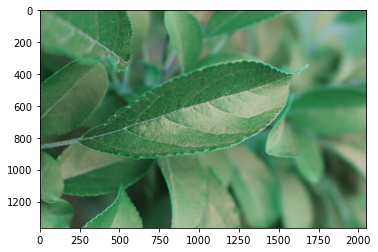

In [18]:
Train_DIR=r'C:\Users\LENOVO\Documents\Patika\Plant Pathology\images\train'
Categories=['healthy','multiple_disease','rust','scab']

for j in Categories:
    path=os.path.join(Train_DIR,j)
    for img in os.listdir(path):
        old_image=cv2.imread(os.path.join(path,img),cv2.COLOR_BGR2RGB)
        plt.imshow(old_image)
        plt.show()
        break    
    break

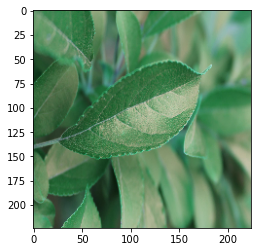

In [19]:
IMG_SIZE=224
new_image=cv2.resize(old_image,(IMG_SIZE,IMG_SIZE))
plt.imshow(new_image)
plt.show()

In [20]:
datagen=ImageDataGenerator(rescale=1./255,
                                shear_range=0.2,
                                zoom_range=0.2,
                                horizontal_flip=True,
                                vertical_flip=True,
                                validation_split=0.2)

In [21]:
train_datagen=datagen.flow_from_directory(r'C:\Users\LENOVO\Documents\Patika\Plant Pathology\images\train',
                                         target_size=(IMG_SIZE,IMG_SIZE),
                                         batch_size=16,
                                         class_mode='categorical',
                                         subset='training')
val_datagen=datagen.flow_from_directory(r'C:\Users\LENOVO\Documents\Patika\Plant Pathology\images\train',
                                         target_size=(IMG_SIZE,IMG_SIZE),
                                         batch_size=16,
                                         class_mode='categorical',
                                         subset='validation')

Found 1458 images belonging to 4 classes.
Found 363 images belonging to 4 classes.


In [23]:
model=Sequential()
model.add(Conv2D(64,(3,3),activation='relu',padding='same',input_shape=(IMG_SIZE,IMG_SIZE,3)))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(4,activation='softmax'))


model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 56, 56, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 28, 28, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 128)       7

In [24]:
model_history=model.fit(train_datagen,validation_data=val_datagen,epochs=30,verbose=1)

Epoch 1/30
92/92 [==============================] - 231s 3s/step - loss: 1.2707 - accuracy: 0.3203 - val_loss: 1.2384 - val_accuracy: 0.3416
Epoch 2/30
92/92 [==============================] - 217s 2s/step - loss: 1.2465 - accuracy: 0.3457 - val_loss: 1.2459 - val_accuracy: 0.3306
Epoch 3/30
92/92 [==============================] - 219s 2s/step - loss: 1.2434 - accuracy: 0.3354 - val_loss: 1.2397 - val_accuracy: 0.3416
Epoch 4/30
92/92 [==============================] - 225s 2s/step - loss: 1.2323 - accuracy: 0.3772 - val_loss: 1.2170 - val_accuracy: 0.3747
Epoch 5/30
92/92 [==============================] - 222s 2s/step - loss: 1.2101 - accuracy: 0.3978 - val_loss: 1.2397 - val_accuracy: 0.3416
Epoch 6/30
92/92 [==============================] - 216s 2s/step - loss: 1.1935 - accuracy: 0.4211 - val_loss: 1.2018 - val_accuracy: 0.4325
Epoch 7/30
92/92 [==============================] - 214s 2s/step - loss: 1.1513 - accuracy: 0.4904 - val_loss: 1.0572 - val_accuracy: 0.5923
Epoch 8/30
92

In [25]:
_,accuracy=model.evaluate(val_datagen)
print('Accuracy : %.2f' % (accuracy*100))

23/23 [==============================] - 25s 1s/step - loss: 0.2752 - accuracy: 0.9146
Accuracy : 91.46


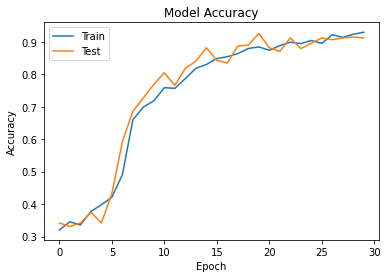

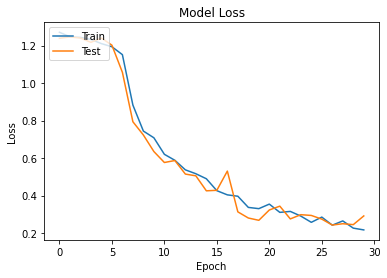

In [29]:
import matplotlib.pyplot as plt
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train','Test'],loc='upper left')
plt.show()

plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train','Test'],loc='upper left')
plt.show()

0


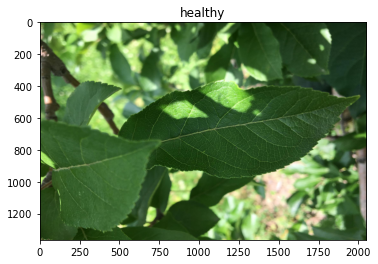

In [33]:
test_image=r'C:\Users\LENOVO\Documents\Patika\Plant Pathology\images\test\Test_11.jpg'
image_result=Image.open(test_image)

from tensorflow.keras.preprocessing import image
test_image=image.load_img(test_image,target_size=(IMG_SIZE,IMG_SIZE))
test_image=image.img_to_array(test_image)
test_image=test_image/255
test_image=np.expand_dims(test_image,axis=0)
result=model.predict(test_image)
print(np.argmax(result))
Categories=['healthy','multiple_disease','rust','scab']
image_result=plt.imshow(image_result)
plt.title(Categories[np.argmax(result)])
plt.show()